In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib
import numpy as np
import seaborn as sns
import imageio
# models we will be using
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# model validation techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from matplotlib import gridspec
# mse: metric used
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
trainingSet=pd.read_csv("C:\\Users\\boris\\Documents\\API\\avila\\avila-tr.txt")
trainingSet.columns=['intercolumnar distance','upper margin','lower margin','exploitation','row number','modular ratio','interlinear spacing','weight','peak number','modular ratio/ interlinear spacing','copyist']

testSet=pd.read_csv("C:\\Users\\boris\\Documents\\API\\avila\\avila-ts.txt")
testSet.columns=['intercolumnar distance','upper margin','lower margin','exploitation','row number','modular ratio','interlinear spacing','weight','peak number','modular ratio/ interlinear spacing','copyist']

In [8]:
trainingSet.shape

(10429, 11)

In [9]:
testSet.shape

(10436, 11)

In [10]:
trainingSet.dtypes

intercolumnar distance                float64
upper margin                          float64
lower margin                          float64
exploitation                          float64
row number                            float64
modular ratio                         float64
interlinear spacing                   float64
weight                                float64
peak number                           float64
modular ratio/ interlinear spacing    float64
copyist                                object
dtype: object

In [9]:
trainingSet.isnull().sum()

intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
copyist                               0
dtype: int64

In [10]:
trainingSet.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000
mean,0.000827,0.033630,-0.000556,-0.002433,0.006354,0.013948,0.005570,0.010234,0.012891,0.000803
std,0.991475,3.921056,1.120251,1.008564,0.992100,1.126296,1.313812,1.003515,1.087715,1.007141
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542001,-0.372457,-0.516103
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111754,0.064084,-0.034621
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654900,0.500624,0.530885
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [43]:
trainingData=trainingSet.iloc[:,0:9]
trainingTarget=trainingSet.iloc[:,10]

testData=trainingSet.iloc[:,0:9]
testTarget=trainingSet.iloc[:,10]

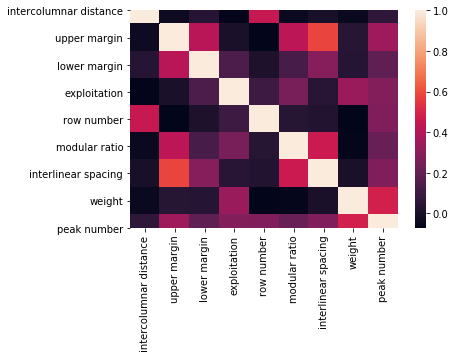

In [44]:
sns.heatmap(trainingData.corr())

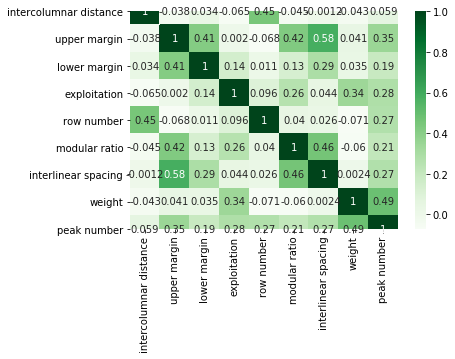

In [45]:
sns.heatmap(trainingData.corr(), annot=True, cmap='Greens')

In [46]:
scaler = StandardScaler()
scaler.fit(trainingData)
X=scaler.transform(trainingData)

In [47]:
mypca = PCA(n_components=9) # On paramètre ici pour ne garder que 3 composantes
# Modèle d'ACP
mypca.fit(X)
print(mypca.explained_variance_ratio_)  
print(mypca.singular_values_)
print(mypca.components_)
# Résultats de l'ACP
data_sortie= mypca.fit_transform(X)

[0.27848639 0.17593999 0.16198166 0.10599031 0.09196244 0.06510476
 0.04926041 0.03903375 0.0322403 ]
[161.67563437 128.50643429 123.3035309   99.74144678  92.90686942
  78.17159355  67.99728704  60.52888874  55.01006107]
[[ 0.00950418  0.48316864  0.33883559  0.24156016  0.08523182  0.40264019
   0.46018131  0.19150606  0.41889363]
 [-0.36335626  0.28733383  0.10720645 -0.34204268 -0.47408393  0.18597591
   0.25948955 -0.426689   -0.38494694]
 [ 0.57580142  0.08563185  0.0705121  -0.3251533   0.51386681  0.07867681
   0.16027957 -0.49168205 -0.11284223]
 [ 0.13554423  0.22071893  0.46713108 -0.46829802 -0.15501448 -0.61036856
  -0.02949883  0.26714432  0.16303648]
 [-0.02244605  0.13616239 -0.72054333 -0.50695593 -0.01170262  0.05741735
   0.22524935  0.22759556  0.3143219 ]
 [ 0.68093639  0.0203078  -0.09879406  0.12281611 -0.50523161  0.15880057
   0.1084586   0.31722489 -0.34379887]
 [ 0.10549424  0.25550203  0.07571798 -0.2121546  -0.14038152  0.44599583
  -0.77037852 -0.0620232  

In [48]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)



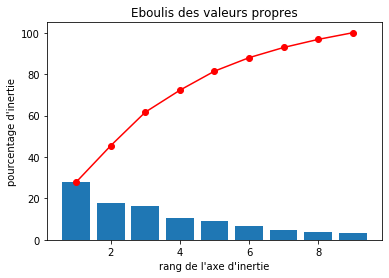

In [58]:
display_scree_plot(mypca)

# Cercle des corrélations

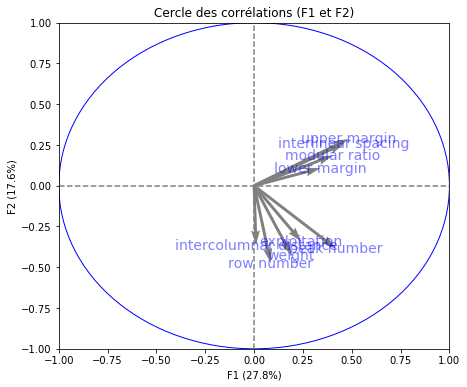

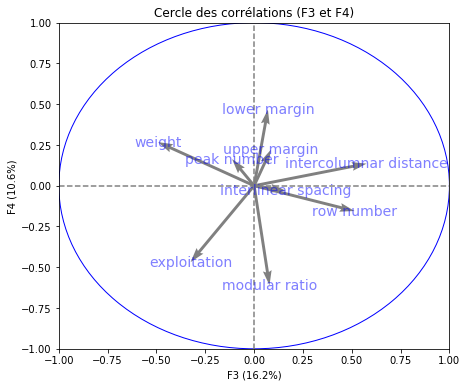

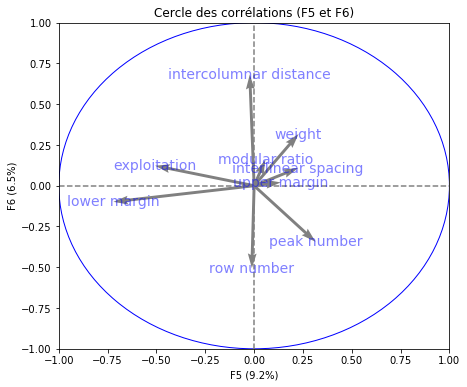

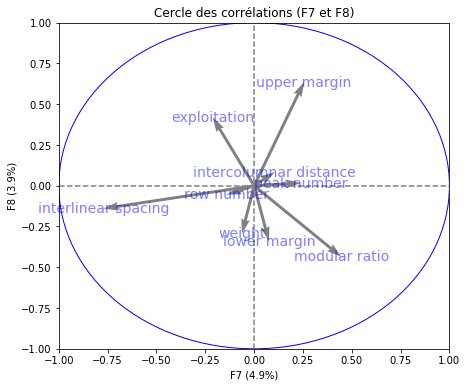

In [60]:

pcs = mypca.components_
display_circles(pcs, 9, mypca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(trainingSet.columns))
plt.show()


# Import packages :

In [2]:

import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
trainingSet

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,copyist
0,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
2,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
4,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
...,...,...,...,...,...,...,...,...,...,...,...
10424,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10425,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10426,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10427,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


# Data wrangling:

In [12]:

X = trainingSet.drop(columns=['copyist'])
y = trainingSet['copyist']

In [13]:
rs = RobustScaler() # Scale features using statistics that are robust to outliers
X_scaled = rs.fit_transform(X)

# Model testing:

In [14]:

models = {'LogisticRegression': LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=500),
          'SVC': SVC(gamma='auto'),
          'KNeighborsClassifier': KNeighborsClassifier(3),
          'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()}

# Split data:

In [15]:

listMetrics,listMetrics_ns=[],[]
for i in [0.1,0.2,0.3,0.4,0.5]:
    X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X,y,train_size=i) # not scaled
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,train_size=i) # scaled
    
    
    # Scaled:
    metrics = {}
    for modelName, model in models.items():
        clf = model.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        metrics[modelName] = {'accuracy': round(accuracy_score(y_test, y_pred),2)}
    #print(metrics)
    listMetrics.append(metrics)
        
#{'LogisticRegression': {'accuracy': 0.55},
# 'SVC': {'accuracy': 0.73},
# 'KNeighborsClassifier': {'accuracy': 0.74},
# 'RandomForestClassifier': {'accuracy': 0.87},
# 'DecisionTreeClassifier': {'accuracy': 0.86},
# 'GradientBoostingClassifier': {'accuracy': 0.88}}

    # Not scaled
    metrics_ns = {}
    for modelName, model in models.items():
        clf = model.fit(X_train_ns, y_train_ns)
        y_pred = clf.predict(X_test_ns)
        metrics_ns[modelName] = {'accuracy': round(accuracy_score(y_test_ns, y_pred),2)}
    listMetrics_ns.append(metrics_ns)
        
#{'LogisticRegression': {'accuracy': 0.57},
# 'SVC': {'accuracy': 0.65},
# 'KNeighborsClassifier': {'accuracy': 0.62},
# 'RandomForestClassifier': {'accuracy': 0.85},
# 'DecisionTreeClassifier': {'accuracy': 0.76},
# 'GradientBoostingClassifier': {'accuracy': 0.88}}

C:\Users\boris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\boris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\boris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# GradientBoostingClassifier GridSearchCV:

In [17]:
parameters = { 
    'n_estimators': [400,450,500,550,600],
    'learning_rate' :[0.1, 0.2, 0.3, 0.4, 0.5]}
gbc = GradientBoostingClassifier() 
clf = GridSearchCV(gbc, parameters, cv=2, scoring='accuracy', verbose=5, n_jobs=-1)
clf.fit(X,y)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   48.1s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   50.6s remaining:   30.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   53.1s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [18]:
print(clf.best_estimator_)
print(clf.best_score_) 
print(clf.best_params_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.9937673794227635
{'learning_rate': 0.1, 'n_estimators': 500}


Text(0.5, 1.0, 'Different classifier')

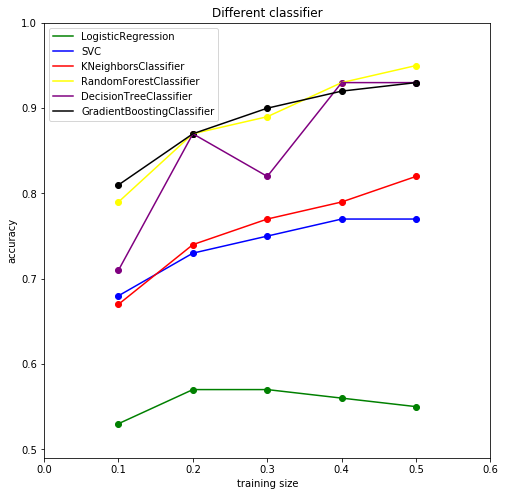

In [16]:
acc1,acc2,acc3,acc4,acc5,acc6=[],[],[],[],[],[]

for accs in listMetrics:
    acc1.append(accs['LogisticRegression']['accuracy'])
    acc2.append(accs['SVC']['accuracy'])
    acc3.append(accs['KNeighborsClassifier']['accuracy'])
    acc4.append(accs['RandomForestClassifier']['accuracy'])
    acc5.append(accs['DecisionTreeClassifier']['accuracy'])
    acc6.append(accs['GradientBoostingClassifier']['accuracy'])
    

trainsize = [0.10,0.20,0.30,0.40,0.50]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainsize,acc1,color='green')
plt.plot(trainsize,acc1,color='green',label ='LogisticRegression')
plt.scatter(trainsize,acc2,color='blue')
plt.plot(trainsize,acc2,color='blue',label='SVC')
plt.scatter(trainsize,acc3,color='red')
plt.plot(trainsize,acc3,color='red',label = 'KNeighborsClassifier')
plt.scatter(trainsize,acc4,color='yellow')
plt.plot(trainsize,acc4,color='yellow',label = 'RandomForestClassifier')
plt.scatter(trainsize,acc5,color='purple')
plt.plot(trainsize,acc5,color='purple',label = 'DecisionTreeClassifier')
plt.scatter(trainsize,acc6,color='black')
plt.plot(trainsize,acc6,color='black',label = 'GradientBoostingClassifier')
plt.legend()
plt.axis([0,0.6,0.49,1])
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.title('Different classifier')

Text(0.5, 1.0, 'Differents Classifier')

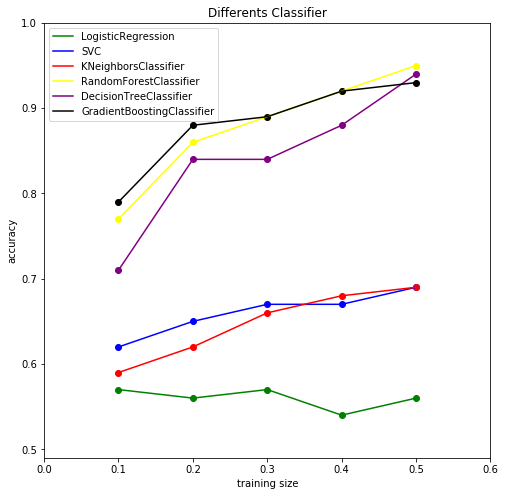

In [17]:
acc1,acc2,acc3,acc4,acc5,acc6=[],[],[],[],[],[]

for accs in listMetrics_ns:
    acc1.append(accs['LogisticRegression']['accuracy'])
    acc2.append(accs['SVC']['accuracy'])
    acc3.append(accs['KNeighborsClassifier']['accuracy'])
    acc4.append(accs['RandomForestClassifier']['accuracy'])
    acc5.append(accs['DecisionTreeClassifier']['accuracy'])
    acc6.append(accs['GradientBoostingClassifier']['accuracy'])
    

trainsize = [0.10,0.20,0.30,0.40,0.50]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainsize,acc1,color='green')
plt.plot(trainsize,acc1,color='green',label ='LogisticRegression')
plt.scatter(trainsize,acc2,color='blue')
plt.plot(trainsize,acc2,color='blue',label='SVC')
plt.scatter(trainsize,acc3,color='red')
plt.plot(trainsize,acc3,color='red',label = 'KNeighborsClassifier')
plt.scatter(trainsize,acc4,color='yellow')
plt.plot(trainsize,acc4,color='yellow',label = 'RandomForestClassifier')
plt.scatter(trainsize,acc5,color='purple')
plt.plot(trainsize,acc5,color='purple',label = 'DecisionTreeClassifier')
plt.scatter(trainsize,acc6,color='black')
plt.plot(trainsize,acc6,color='black',label = 'GradientBoostingClassifier')
plt.legend()
plt.axis([0,0.6,0.49,1])
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.title('Differents Classifier')

# Predictions:

In [29]:

Xtesting = testSet.drop(columns=['copyist'])
Xtesting_scaled = rs.transform(Xtesting)
finalpred = clf.predict(Xtesting) # Call predict on the estimator with the best found parameters
# finalpred = clf.predict(Xtesting_scaled)


In [31]:
#result of predictions
y = testSet['copyist']

nb_true=0
for i in range (len(y)):
    if y[i]==finalpred[i]:
        nb_true+=1

print(nb_true/len(y))

0.9985626676887697


In [32]:
!pip install joblib

In [35]:
import joblib

In [34]:
model_folder='./model'
model_filename= model_folder + '/model.sav'
if not path.exists(model_folder):
    mkdir(model_folder)

NameError: name 'path' is not defined

In [40]:
joblib.dump(clf,'C:/Users/boris/Documents/API/model.h5',compress=3)

['C:/Users/boris/Documents/API/model.h5']